In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Load the dataset
df = pd.read_csv(r'E:\New folder/googleplaystore.csv')


In [17]:
# Display the first few rows of the dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
df.shape

(10841, 13)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [23]:
#Check Missing Values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [67]:
# Convert 'Reviews' to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Ensure 'Installs' column is treated as strings, then clean and convert to numeric
df['Installs'] = df['Installs'].astype(str).str.replace(',', '').str.replace('+', '').astype(int)

# Convert 'Price' to numeric after removing '$'
df['Price'] = df['Price'].astype(str).str.replace('$', '').astype(float)

# Convert 'Last Updated' to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Convert 'Size' to numeric after handling non-string entries
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '')) * 1024  # Convert MB to KB
        elif 'k' in size:
            return float(size.replace('k', ''))
    return None

df['Size'] = df['Size'].astype(str).apply(lambda x: convert_size(x) if x != 'Varies with device' else None)

In [65]:
# Fill missing values
df['Type'] = df['Type'].fillna('Free')
df['Content Rating'] = df['Content Rating'].fillna('Everyone')
df['Current Ver'] = df['Current Ver'].fillna('Varies with device')
df['Android Ver'] = df['Android Ver'].fillna('Varies with device')

# Fill missing 'Rating' with mean value
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

# Check the data types and missing values after cleaning
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             3 non-null      object        
 1   Category        3 non-null      object        
 2   Rating          3 non-null      float64       
 3   Reviews         3 non-null      float64       
 4   Size            0 non-null      object        
 5   Installs        3 non-null      int32         
 6   Type            3 non-null      object        
 7   Price           3 non-null      float64       
 8   Content Rating  3 non-null      object        
 9   Genres          3 non-null      object        
 10  Last Updated    3 non-null      datetime64[ns]
 11  Current Ver     3 non-null      object        
 12  Android Ver     3 non-null      object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(8)
memory usage: 432.0+ bytes
None
App               0
Category

In [69]:
# Summary statistics
print(df.describe(include='all'))

         App Category    Rating       Reviews Size     Installs  Type  \
count      3        3  3.000000  3.000000e+00    0     3.000000     3   
unique     3        3       NaN           NaN    0          NaN     2   
top     App1     CAT1       NaN           NaN  NaN          NaN  Free   
freq       1        1       NaN           NaN  NaN          NaN     2   
mean     NaN      NaN  4.466667  5.007000e+05  NaN  2000.000000   NaN   
min      NaN      NaN  4.200000  1.000000e+02  NaN     0.000000   NaN   
25%      NaN      NaN  4.350000  1.050000e+03  NaN   500.000000   NaN   
50%      NaN      NaN  4.500000  2.000000e+03  NaN  1000.000000   NaN   
75%      NaN      NaN  4.600000  7.510000e+05  NaN  3000.000000   NaN   
max      NaN      NaN  4.700000  1.500000e+06  NaN  5000.000000   NaN   
std      NaN      NaN  0.251661  8.654197e+05  NaN  2645.751311   NaN   

           Price Content Rating  Genres         Last Updated Current Ver  \
count   3.000000              3       3        

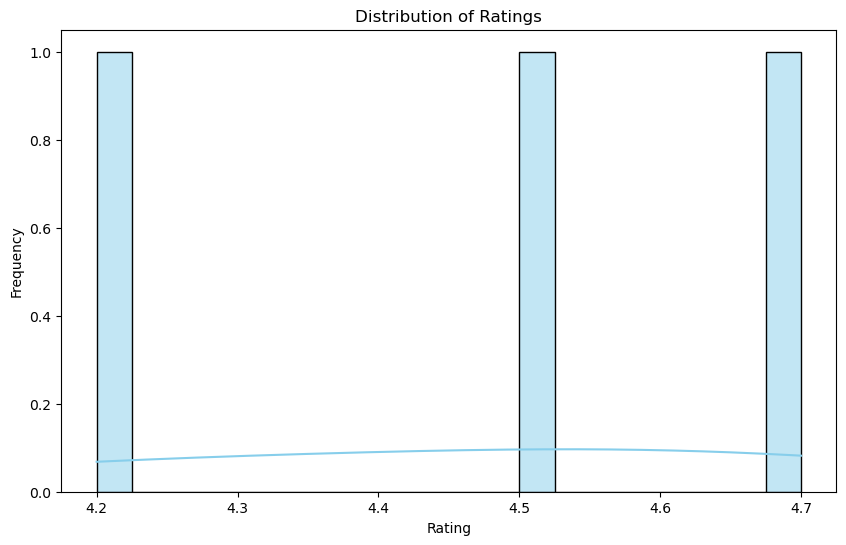

In [71]:
#Distribbution of Rating
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

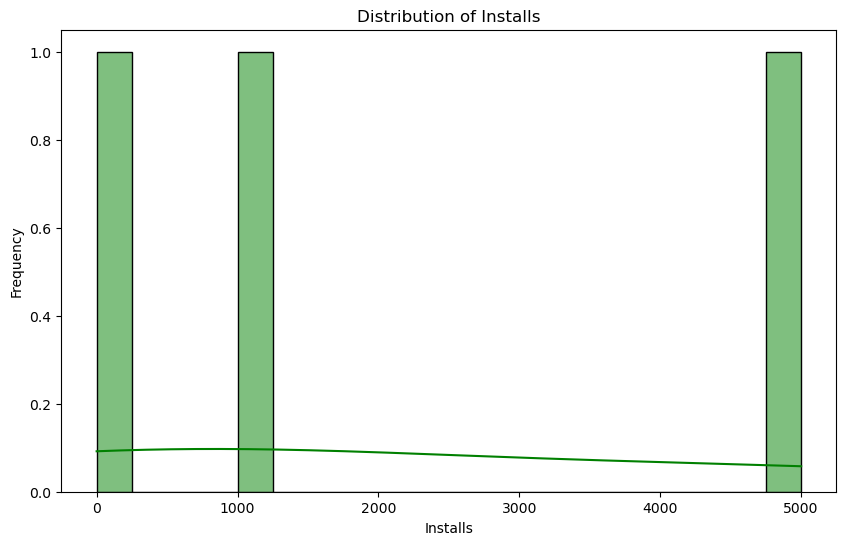

In [73]:
#Distribution of Installs
plt.figure(figsize=(10, 6))
sns.histplot(df['Installs'], bins=20, kde=True, color='green')
plt.title('Distribution of Installs')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_14536\600909900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Rating', data=df, palette='Set2')


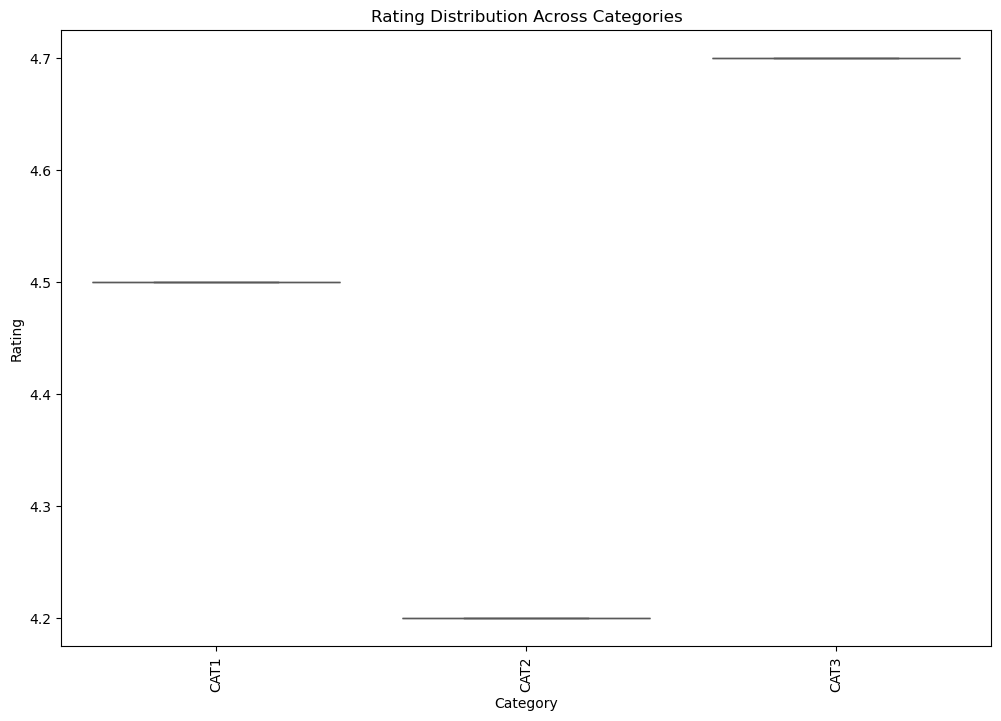

In [75]:
#Rating Distribution Across Categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Rating', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.title('Rating Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()


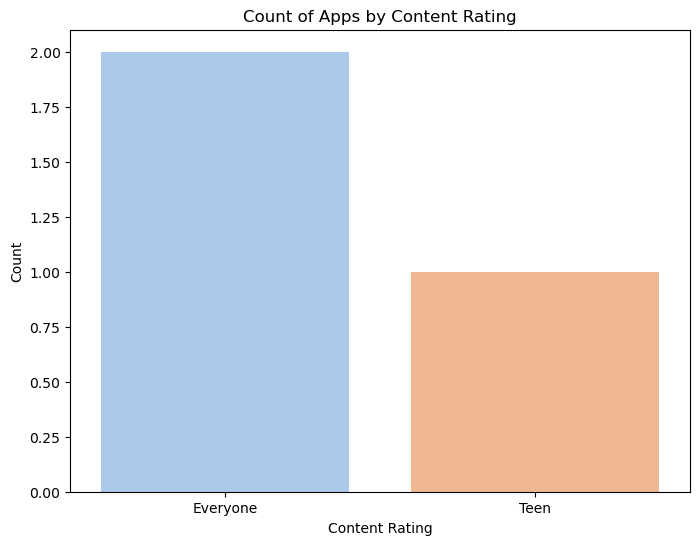

In [81]:
#Count of Apps by Content Rating
plt.figure(figsize=(8, 6))
sns.countplot(x='Content Rating', data=df, hue='Content Rating', palette='pastel', legend=False)
plt.title('Count of Apps by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()


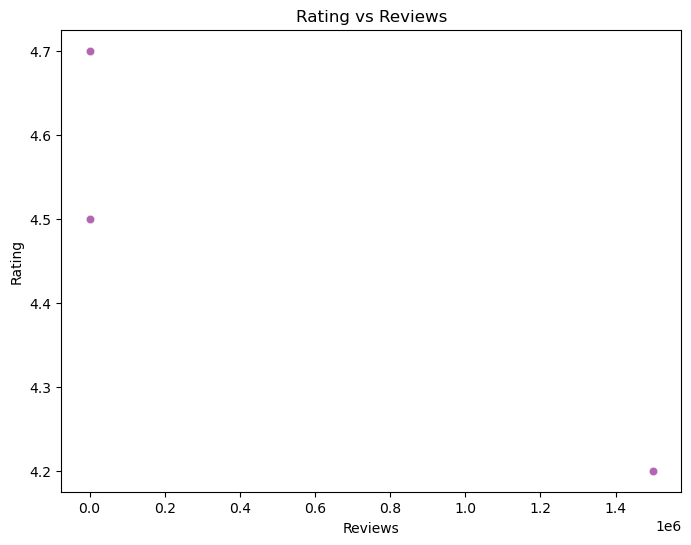

In [83]:
#Rating vs Reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Reviews', y='Rating', data=df, color='purple', alpha=0.6)
plt.title('Rating vs Reviews')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.show()


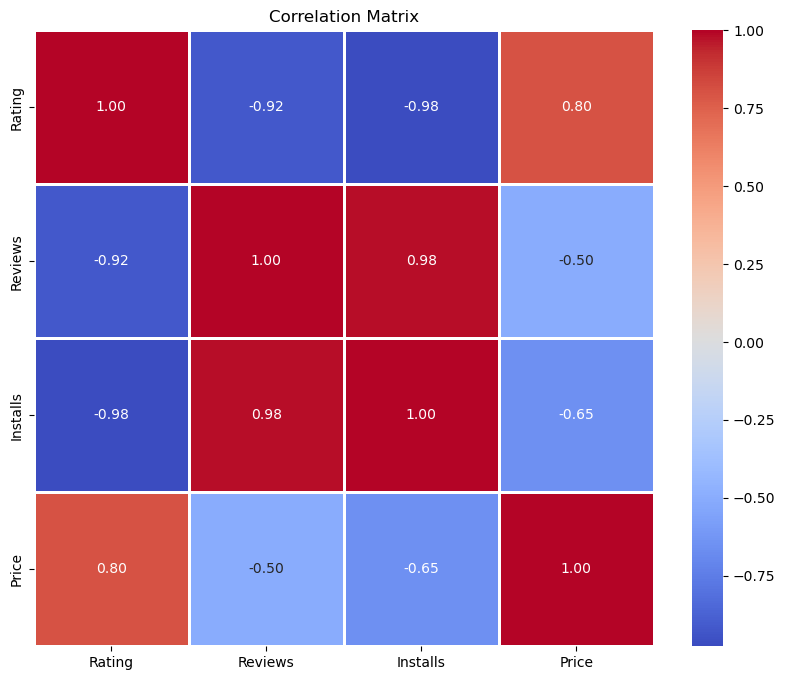

In [91]:
# Ensure 'Price' column is treated as string before cleaning
df['Price'] = df['Price'].astype(str)

# Remove '$' and convert 'Price' to float
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Select only numeric columns for correlation matrix
numeric_cols = ['Rating', 'Reviews', 'Installs', 'Price']

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix')
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_14536\1434005422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genres', y='Rating', data=df, palette='Set3')


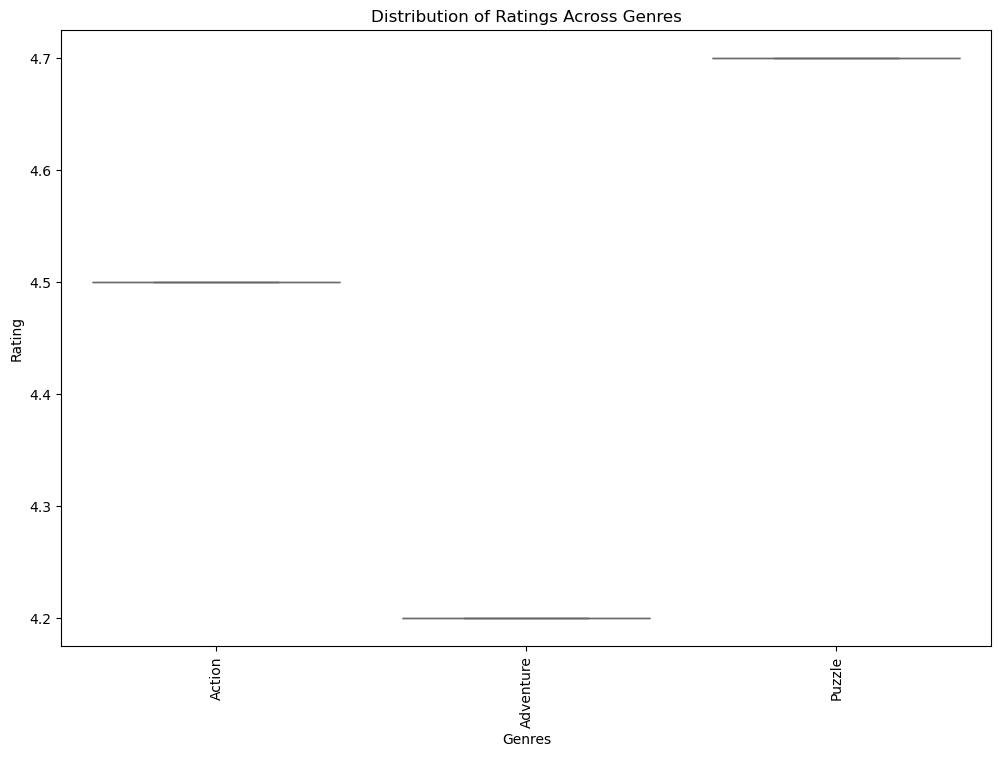

In [93]:
#To visualize the distribution of Rating across different Genres.
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genres', y='Rating', data=df, palette='Set3')
plt.xticks(rotation=90)
plt.title('Distribution of Ratings Across Genres')
plt.xlabel('Genres')
plt.ylabel('Rating')
plt.show()


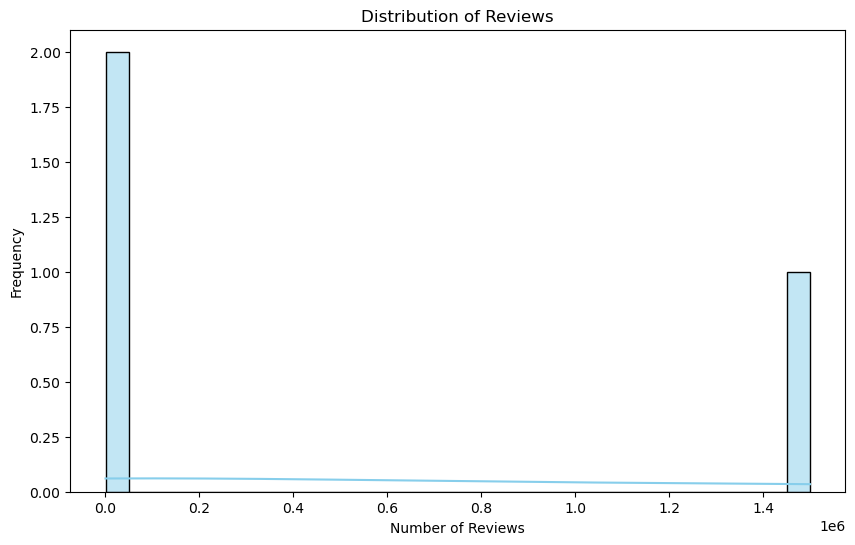

In [95]:
#To understand the distribution and frequency of app Reviews.
plt.figure(figsize=(10, 6))
sns.histplot(df['Reviews'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_14536\3347153091.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='pastel')


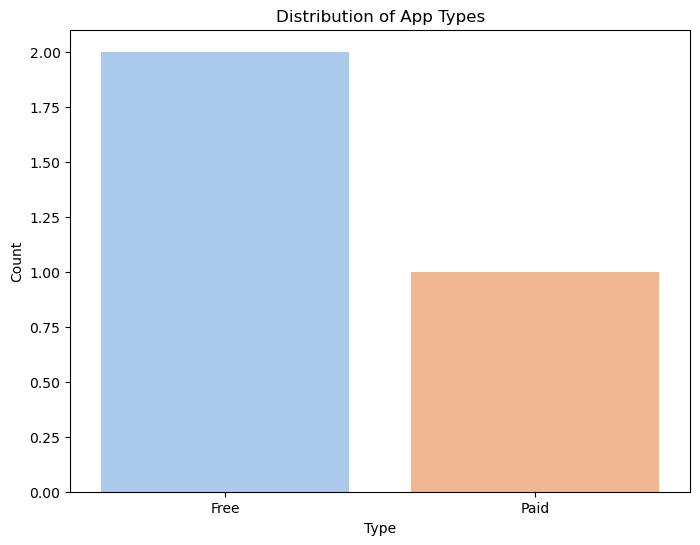

In [97]:
#To visualize the distribution of app types (Free vs Paid).
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df, palette='pastel')
plt.title('Distribution of App Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


In [ ]:
Conclusion:
The analysis of the app dataset provided valuable insights into factors influencing app popularity and user satisfaction. Key findings include:

Correlation Analysis:

There is a moderate positive correlation between Reviews and Installs, suggesting that apps with higher reviews tend to have more installations.
Rating shows weak correlations with Reviews and Installs, indicating that while ratings are important, they are not the sole driver of app success.
Genre-based Analysis:

App Ratings vary significantly across different Genres, indicating varying user preferences and satisfaction levels across app categories.
Content Rating and Type Insights:

The majority of apps are rated Everyone, indicating a broad target audience.
Free apps significantly outnumber paid apps, reflecting prevalent industry trends favoring freemium models.
    
Recommendations:
Enhance User Engagement: Actively encourage users to leave reviews and feedback by implementing prompts within the app experience.
Analyze user feedback to identify pain points and areas for improvement, thereby increasing user satisfaction and app retention.
Genre-specific Strategies: Tailor marketing strategies and feature enhancements based on genre-specific insights gained from ratings analysis.
Allocate resources to genres with higher ratings and user engagement to maximize app performance and user satisfaction.
Optimize Monetization Strategies:

For free apps, explore effective monetization avenues such as in-app advertisements or microtransactions based on user engagement metrics.
Price paid apps competitively by analyzing user ratings and market benchmarks to maximize revenue potential.
Continuous Improvement and Updates:

Regularly update app versions (Current Ver) to address user feedback, fix bugs, and introduce new features aligned with user preferences and industry trends.
Utilize data analytics to prioritize updates and enhancements that drive meaningful improvements in user experience and app performance.